In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

## 1. The definition of loss function

In [2]:
def loss(rx, ry, w):
    m = len(rx)
    sse = 0.
    for j in range(m):
        y = w[0] + w[1] * rx[j]
        sse += (ry[j] - y) ** 2
    return sse[0]

## 2. Assume a linear regression model

In [3]:
from sklearn.datasets import make_regression
rx, ry = make_regression(
    n_samples=100,
    n_features=1,
    noise=1,
    bias=1
)

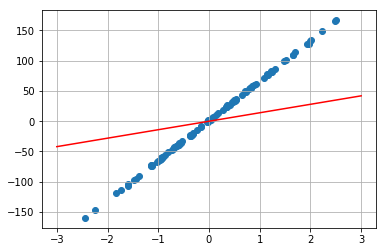

In [4]:
plt.grid()
plt.scatter(rx, ry)
x = np.linspace(-3,3,100)
w=[0,14]
y = w[0] + x * w[1]
plt.plot(x, y, '-r', label=f'y={w[1]}x+{w[0]}')

In [5]:
loss(rx, ry, w)

314111.84323735756

## 3. Plot the error function for w[1]

In [17]:
errors=[]
samples = np.linspace(0,100, 1000)
for n in samples:
    errors.append(loss(rx, ry, [0, n]))
errors=pd.Series(errors)

In [18]:
errors

0      505599.445071
1      504069.236092
2      502541.347022
3      501015.777860
4      499492.528607
5      497971.599263
6      496452.989827
7      494936.700300
8      493422.730681
9      491911.080972
10     490401.751170
11     488894.741278
12     487390.051294
13     485887.681218
14     484387.631052
15     482889.900794
16     481394.490444
17     479901.400003
18     478410.629471
19     476922.178848
20     475436.048133
21     473952.237327
22     472470.746429
23     470991.575440
24     469514.724360
25     468040.193188
26     466567.981925
27     465098.090571
28     463630.519125
29     462165.267588
           ...      
970    111572.598461
971    112292.700860
972    113015.123169
973    113739.865386
974    114466.927512
975    115196.309546
976    115928.011489
977    116662.033340
978    117398.375101
979    118137.036770
980    118878.018347
981    119621.319833
982    120366.941228
983    121114.882531
984    121865.143743
985    122617.724864
986    123372

In [19]:
errors.shape

(1000,)

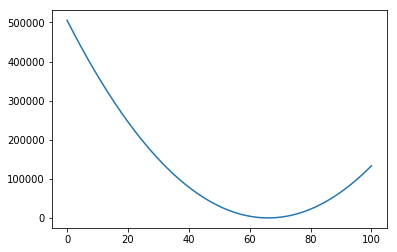

In [20]:
plt.plot(samples, errors)

## 4. Plot the error function for w[0]

In [39]:
errors=[]
samples = np.linspace(0,1, 1000)
for n in samples:
    errors.append(loss(rx, ry, [n, 75]))
errors=pd.Series(errors)

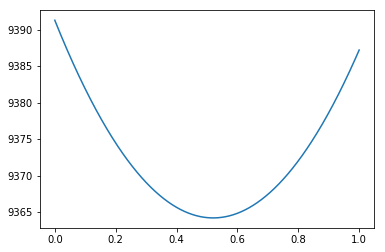

In [40]:
plt.plot(samples, errors)

## 5. Plot the 3D error surface

In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [41]:
w1_samples = np.linspace(40,100, 100)
w0_samples = np.linspace(0, 1, 100)

In [42]:
w0_samples

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [43]:
X, Y = np.meshgrid(w0_samples, w1_samples)

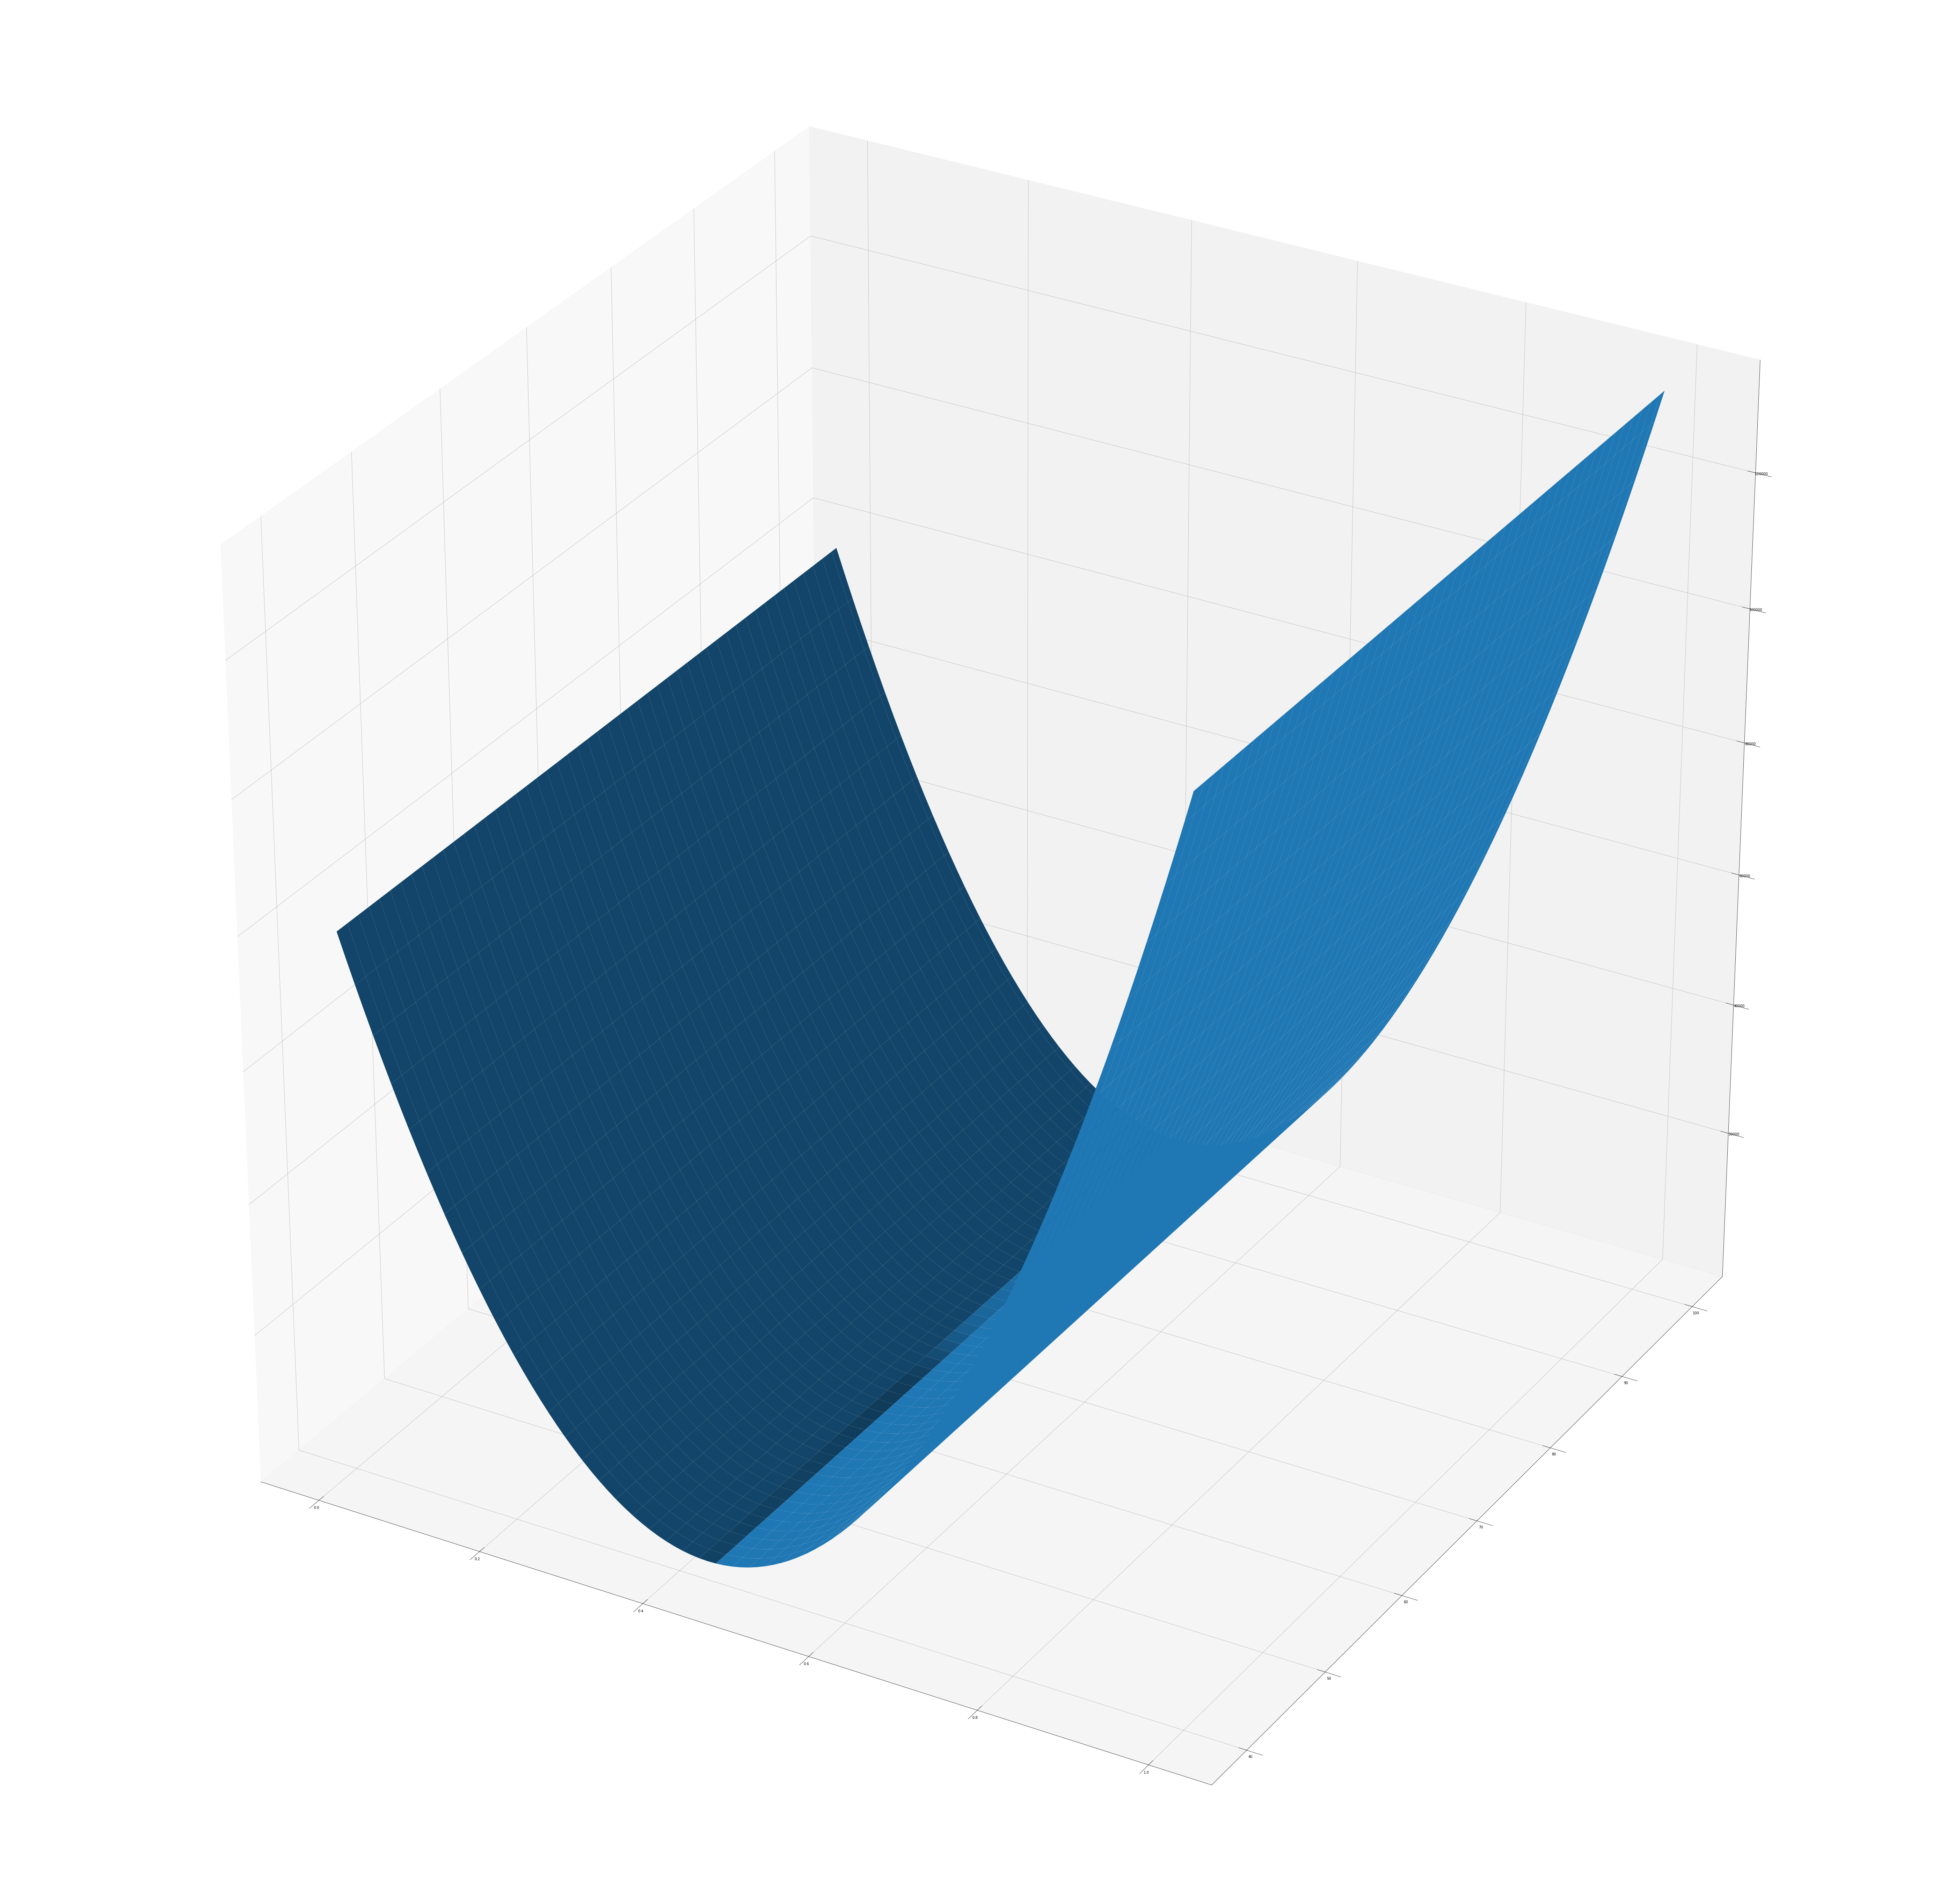

In [49]:
# Compute a 3D parabola
total_errors = []
for i in range(len(w0_samples)):
    for j in range(len(w1_samples)):
        total_errors.append(loss(rx, ry, [w0_samples[i], w1_samples[j]]))

# Open a figure to place the plot on
fig = plt.figure(figsize=(100, 100))
# Initialize 3D plot
ax = fig.gca(projection='3d')
# Plot the surface
ax.plot_surface(X=X,Y=Y,Z=np.array(total_errors).reshape(100, 100))

plt.show()